In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#Import Datasets
train=pd.read_csv(r"C:\Users\Vinu\Desktop\Technocolabs\Final Project\train.csv")
test=pd.read_csv(r"C:\Users\Vinu\Desktop\Technocolabs\Final Project\test.csv")

In [69]:
train.comment_text.str.len().describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64

In [70]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [71]:
print(train.isnull().sum())
print('for test set null values are')
print(test.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
for test set null values are
id              0
comment_text    0
dtype: int64


In [72]:
# Here is the total number of samples belongs to each class
x = train.iloc[:,2:].sum()
print('total number of comment:',len(train),'\n','samples belongs to each class','\n',x)

total number of comment: 159571 
 samples belongs to each class 
 toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


C:\Users\Vinu\.conda\envs\stat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


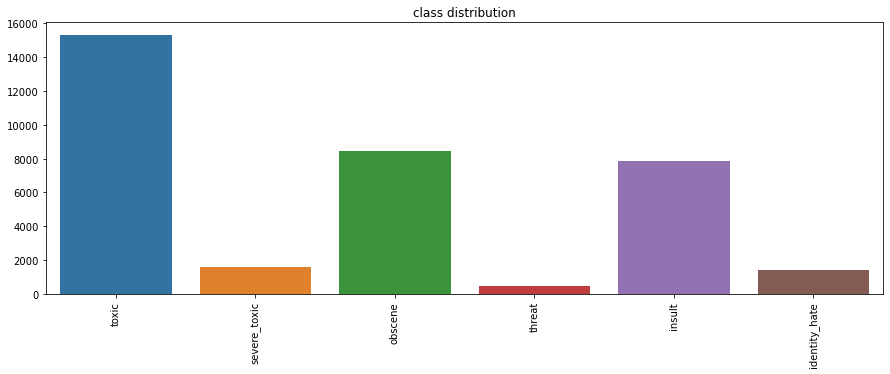

In [73]:
plt.figure(figsize=(15,5))
sns.barplot(x.index,x.values)
plt.xticks(rotation=90)
plt.title('class distribution')
plt.show()

In [74]:
COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
count=train[COLUMNS].sum()

In [75]:
train_comb = train.groupby(COLUMNS).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
train_comb.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,count
0,0,0,0,0,0,0,143346
1,1,0,0,0,0,0,5666
2,1,0,1,0,1,0,3800
3,1,0,1,0,0,0,1758
4,1,0,0,0,1,0,1215


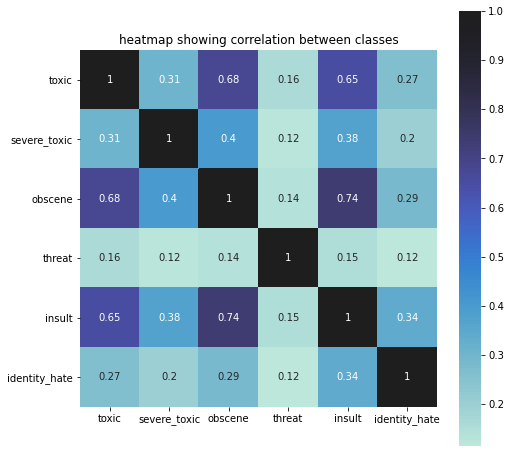

In [76]:
#To find correlation
y = train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(y,annot=True,center=True,square=True)
plt.title('heatmap showing correlation between classes')
plt.show()
#Here i intentionally included seventh class which we created

In [77]:
from matplotlib_venn import venn2

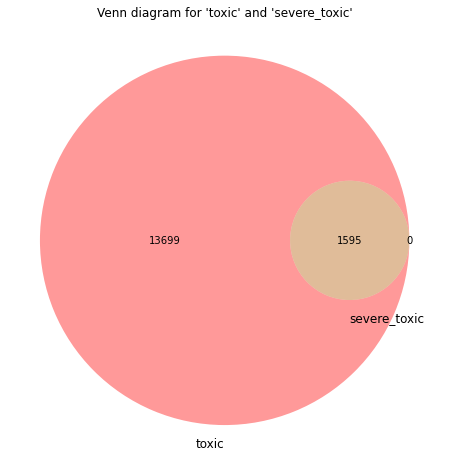

In [78]:
t = train[(train['toxic'] == 1) & (train['severe_toxic'] == 0)].shape[0]
s = train[(train['toxic'] == 0) & (train['severe_toxic'] == 1)].shape[0]

t_s = train[(train['toxic'] == 1) & (train['severe_toxic'] == 1)].shape[0]

plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'severe_toxic'))
plt.show()